In [522]:
"""
This is one way of implementing the algorithm. Feel free to implement the functions in another way.
This way of implementing keeps the datatype to be pandas dataframe or pandas series (pretty much the same thing...)
through the entire code. Maybe look/Users/jakobtolstrup/Downloads/KmeansTemplate (3).py into numpy arrays if you want to implement it differently.

Plotting the distribution and inspecting pandas dataframes can be easier to understand in a ipynb.
Feel free to copy this code into Jupyter Notebook or a Google Colab.
I will show you my implementation in a jupyter notebook at the end of the class.
"""

import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [523]:
df = pd.read_csv('Data miners 2022 (answers).csv')
df = df.reset_index(drop=True) # Remove the index from the file
df['class'] = 1 # Assign all points to class 1

#change Your height (in International inches)\nAlready, an awkward data storage format. It's good to be fluent in multiple systems! to height
df = df.rename(columns={'Your height (in International inches)\nAlready, an awkward data storage format. It\'s good to be fluent in multiple systems!':'height'})
#change Your mean shoe size (In European Continental system)	to shoe_size
df = df.rename(columns={'Your mean shoe size (In European Continental system)':'shoe_size'})

#remove all columns but shoe_size, height, and class
df = df[['height', 'shoe_size', 'class']]

# df['height'] = df['height'] / max(df['height']) # Normalize height
# df['shoe_size'] = df['shoe_size'] / max(df['shoe_size']) # Normalize shoe_size

display(df) # Display the dataframe

,height,shoe_size,class
0,6.200000,47.0,1
1,167.000000,39.0,1
2,68.000000,42.0,1
3,66.500000,38.0,1
4,65.740000,40.0,1
5,76.000000,42.0,1
6,70.900000,44.0,1
7,7125.984252,43.0,1
8,70.800000,42.0,1
9,69.000000,40.0,1


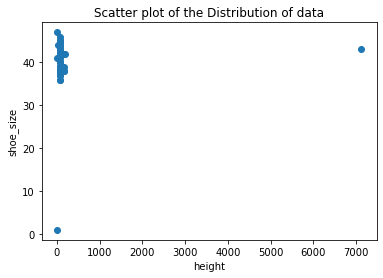

In [524]:
plt.title('Scatter plot of the Distribution of data')   #
plt.scatter(df['height'],df['shoe_size'])              # Visualizing the distribution
#put the label eruption and waiting on the x and y axis
plt.xlabel('height')
plt.ylabel('shoe_size')

#remove observations that are 3 standard deviations from the mean
df = df[(np.abs(df.height-df.height.mean()) <= (3*df.height.std())) & (np.abs(df.shoe_size-df.shoe_size.mean()) <= (3*df.shoe_size.std()))]

plt.show()


In [525]:

def initializeMeans(df, k):
    means = pd.DataFrame(columns=df.columns)
    for i in range(k):
        means = means.append(df.sample(n=1))
        means = means.reset_index(drop=True)
        means['class'][i] = i
    return means

initializeMeans(df, 3)


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))


,height,shoe_size,class
0,71.0,42.5,0
1,62.0,44.0,1
2,63.0,37.0,2


In [526]:
import math

#create a helper function that calulates the euclidean distance between two points
def euclideanDistHelper(point1, point2):
    return math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

def euclideanDist(df,pointIDX,means):
    distances = []
    #loop over all the means
    for i in range(len(means)):
        #we calculate the euclidean distance between the point and the mean
        dist = euclideanDistHelper(df.iloc[pointIDX],means.iloc[i])
        #we append the distance to the list
        distances.append(dist)
    #print(distances)
    #print(distances.index(min(distances)))
    lowestDist = min(distances)
    df.loc[pointIDX, 'class'] = distances.index(lowestDist)
    return df

euclideanDist(df,1,initializeMeans(df,3))

/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))


,height,shoe_size,class
0,6.200000,47.0,1
1,167.000000,39.0,0
2,68.000000,42.0,1
3,66.500000,38.0,1
4,65.740000,40.0,1
5,76.000000,42.0,1
6,70.900000,44.0,1
8,70.800000,42.0,1
9,69.000000,40.0,1
10,6.000000,41.0,1


In [527]:

def updateMean(df,means):
    #Here we create a new df that contains the new means
    newMeans = pd.DataFrame(columns=df.columns)
    
    #we loop over the the means
    for i in range(len(means)):
        meanClass = means.iloc[i]['class'] #get the class of the mean
        cluster = df[df['class'] == meanClass] #we select the points that belong to the cluster
        mean = cluster.mean() #we calculate the mean of the points in the cluster
        newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans dataframe
    
    return newMeans

updateMean(df,initializeMeans(df,3))


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/2215215458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.appe

,height,shoe_size,class
0,167.0,39.0,0.0
1,73.426935,40.96,1.0
2,NaN,NaN,NaN


In [528]:
def Kmeans(df,iterations, k):
    """
    When you have implemented the three functions this function should work and run the Kmeans algorithm!
    """
    means = initializeMeans(df, k)

    for iteration in range(iterations): # Change this when implementing how many times it should recalculate the mean

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,means)
            
        means = updateMean(df, means)

    return df,means

dfk, m = Kmeans(df,5,3)



/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/3566686423.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(df.sample(n=1))
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/2215215458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.appe

Iteration 0/0
Iteration 1/1
Iteration 2/2
Iteration 3/3
Iteration 4/4


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/2215215458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans dataframe
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/2215215458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans dataframe
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8285/2215215458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newMeans = newMeans.append(mean, ignore_index=True) #We append the mean to the newMeans dataframe
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipyker

,height,shoe_size,class
0,6.200000,47.0,2.0
1,167.000000,39.0,0.0
2,68.000000,42.0,2.0
3,66.500000,38.0,2.0
4,65.740000,40.0,2.0
5,76.000000,42.0,1.0
6,70.900000,44.0,2.0
8,70.800000,42.0,2.0
9,69.000000,40.0,2.0
10,6.000000,41.0,2.0


      height  shoe_size class
0  85.233333      40.75   0.0
1  62.711429  41.714286   1.0
2  75.999126  40.802632   2.0


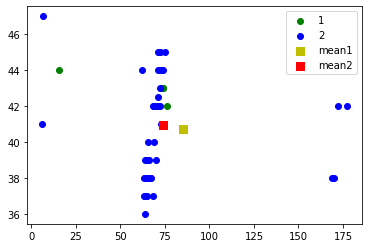

In [529]:
plt.clf()
plt.scatter(df.loc[df['class'] == 1]['height'],df.loc[df['class'] == 1]['shoe_size'],color='g',label='1')  #
plt.scatter(df.loc[df['class'] == 2]['height'],df.loc[df['class'] == 2]['shoe_size'],color='b',label='2')  #
# plt.scatter(df.loc[df['class'] == 3]['height'],df.loc[df['class'] == 3]['shoe_size'],color='y',label='3')  #
                                                                                                            #
plt.scatter(mean1['height'],mean1['shoe_size'],s=70,label='mean1',marker='s',color='y')                    # Visualizing the final class distribution
plt.scatter(mean2['height'],mean2['shoe_size'],s=70,label='mean2',marker='s',color='r')
# plt.scatter(mean3['height'],mean2['shoe_size'],s=70,label='mean3',marker='s',color='b')                    #
                                                                                                            #
plt.legend()                                                                                                #
plt.show()    